# Question 1 - How Does Seasonality Impact Genre Success?

For this question, we'll be looking at the top 6 highest grossing genres and investigating<br>
when the best month to release movies in each genre would be. <br><br>
Ideally, this can lead to a release schedule where Microsoft can time the release of their new films<br>
with the best time according to our data.

In [2]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import seaborn as sns
import os
%matplotlib inline

In [4]:
# Pulling in our cleaned data, adding a profit column, and looking at head and info
df = pd.read_csv('cleaned_genre_exploration.csv')
df['profit'] = df['worldwide_gross']-df['production_budget']
#Adding month name for readability 
df['month'] = pd.to_datetime(df['release_month'], format='%m').dt.month_name().str.slice(stop=3)

display(df.head())
df.info()

,Unnamed: 0,Unnamed: 0.1,genre_ids,id,original_language,popularity,release_date,vote_average,vote_count,tconst,...,G2,G3,id_budg,release_date_budg,production_budget,domestic_gross,worldwide_gross,release_month,profit,month
0,#Horror,14656,"[18, 9648, 27, 53]",301325,de,6.099,2015-11-20,3.3,102,tt3526286,...,Drama,Horror,16,"Nov 20, 2015",1500000,0,0,11,-1500000,Nov
1,10 Cloverfield Lane,17422,"[53, 878, 18]",333371,en,17.892,2016-03-11,6.9,4629,tt1179933,...,Horror,Mystery,54,"Mar 11, 2016",5000000,72082999,108286422,3,103286422,Mar
2,10 Days in a Madhouse,15907,[18],345003,en,0.955,2015-11-20,5.4,7,tt3453052,...,NaN,NaN,48,"Nov 11, 2015",12000000,14616,14616,11,-11985384,Nov
3,12 Strong,24032,"[10752, 18, 36, 28]",429351,en,13.183,2018-01-19,5.6,1312,tt1413492,...,Drama,History,64,"Jan 19, 2018",35000000,45819713,71118378,1,36118378,Jan
4,12 Years a Slave,7911,"[18, 36]",76203,en,16.493,2013-10-30,7.9,6631,tt2024544,...,Drama,History,18,"Oct 18, 2013",20000000,56671993,181025343,10,161025343,Oct


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2756 entries, 0 to 2755
Data columns (total 24 columns):
Unnamed: 0           2756 non-null object
Unnamed: 0.1         2756 non-null int64
genre_ids            2756 non-null object
id                   2756 non-null int64
original_language    2756 non-null object
popularity           2756 non-null float64
release_date         2756 non-null object
vote_average         2756 non-null float64
vote_count           2756 non-null int64
tconst               2756 non-null object
primary_title        2756 non-null object
start_year           2756 non-null float64
runtime_minutes      2756 non-null float64
G1                   2756 non-null object
G2                   1949 non-null object
G3                   1330 non-null object
id_budg              2756 non-null int64
release_date_budg    2756 non-null object
production_budget    2756 non-null int64
domestic_gross       2756 non-null int64
worldwide_gross      2756 non-null int64
release_month 

<b>Grouping the data for clearer results:</b><br>Below is a brief look at some of the data we'll be diving into.  We have each genre broken out by month.  With this information, we can observe how much revenue a given genre has taken in on a given month.  <br><br>For example, in this first row, we see that Action films have brought in around 6.5 billion gross worldwide in all Januaries combined in the dataset, vs. almost 17.8 billion in all the Mays observed.<br><br>This may not be best for predicting how much exactly an individual film may earn, but it does show when the market is hot and demand for a given genre is higher than that of another month or genre.

In [28]:
g1_group = df.groupby(['G1', 'release_month'])['worldwide_gross', 'domestic_gross'].agg(['sum'])
g1_group.head(20)

worldwide_gross domestic_gross
                                    sum            sum
G1        release_month                               
Action    1                  6447260708     2823642222
          2                  5159785020     2179842914
          3                  8340266478     3163039959
          4                  7505453349     2376869355
          5                 17768119453     6184101954
          6                 15008160741     5462460391
          7                 13922555764     5183855942
          8                  8112320628     3361563349
          9                  6297114286     2374678172
          10                 4303716163     1432941893
          11                10323291664     3838734332
          12                 6603139221     2468109282
Adventure 1                   978443732      426982841
          2                  3863605660     1401782516
          3                  4598848460     1807659189
          4                  2450987758      877316055
          5                  1604638318      593215640
          6                  8935329839     3381852924
          7                  6354345775     1955993102
          8                  1005735659      467672741

In [6]:
#g1_group.plot(kind='barh', stacked = True, figsize = (15,30))

In [7]:
#g = sns.FacetGrid(df, col = 'G1', col_wrap = 5, height = 6)
#g.map(sns.lineplot, 'release_month', 'worldwide_gross');

### Which Genres Bring in the Most Revenue Overall?
The next question we had was which genres perform the best.  Sorted by worldwide gross revenue, we see that Action, Adventure, Drama, Comedy, and Documentary films perform the best.  Below, we made a list of the top 6 genres, and then everything else for use later if need be.  <br><br>For now, we'll just focus on these top 6 genres.

In [144]:
df2 = df.groupby(['G1'])['worldwide_gross', 'domestic_gross'].agg(['sum'])
display(df2.head(20))
#Top 5 categories are Action, Adventure, Drama, Comedy, and Documentary
g_cat1 = ['Action', 'Adventure', 'Drama', 'Comedy', 'Documentary', 'Biography']
g_cat2 = ['Horror', 'Crime', 'Animation', 'Family', 
          'Thriller', 'Fantasy', 'Sci-fi', 'Musical', 'Mystery', 
          'Music', 'Romance', 'Western', 'Sport']

,worldwide_gross,domestic_gross
,sum,sum
G1,,
Action,109791183475,40849839765
Adventure,47868349381,17283424015
Animation,4911128109,1979125228
Biography,12223916132,6111430255
Comedy,26009817627,14240164659
Crime,6942673573,3273825901
Documentary,14984955050,6860469333
Drama,32647318120,15024422026


In [145]:
#This new dataframe looks at the top 6 genres with a focus on the past 10 years.
df3 = df[(df['G1'].isin(['Action', 'Adventure', 'Drama', 'Comedy', 'Documentary', 'Biography'])) 
         & (df['start_year'] > 2010)]

In [13]:
#Starting with this chart, but it's not working exactly. . .
#g = sns.FacetGrid(df3, col = 'G1', col_wrap = 2, height = 6)
#g.map(sns.lineplot, 'release_month', 'worldwide_gross');

### Supporting Charts and Explanation:

In [146]:
#Grouping the data further into our separate categories
action = df3[df3['G1']=='Action'].groupby(['release_month']).sum()
adventure = df3[df3['G1']=='Adventure'].groupby(['release_month']).sum()
drama = df3[df3['G1']=='Drama'].groupby(['release_month']).sum()
comedy = df3[df3['G1']=='Comedy'].groupby(['release_month']).sum()
documentary = df3[df3['G1']=='Documentary'].groupby(['release_month']).sum()
biography = df3[df3['G1']=='Biography'].groupby(['release_month']).sum()

#actionii = action.groupby(['release_month']).sum() - reserve code, please ignore

Worldwide Gross (Pink) & Domestic Gross (Blue) in Tens of Billions
Total amount for each genre by month over the past 10 years


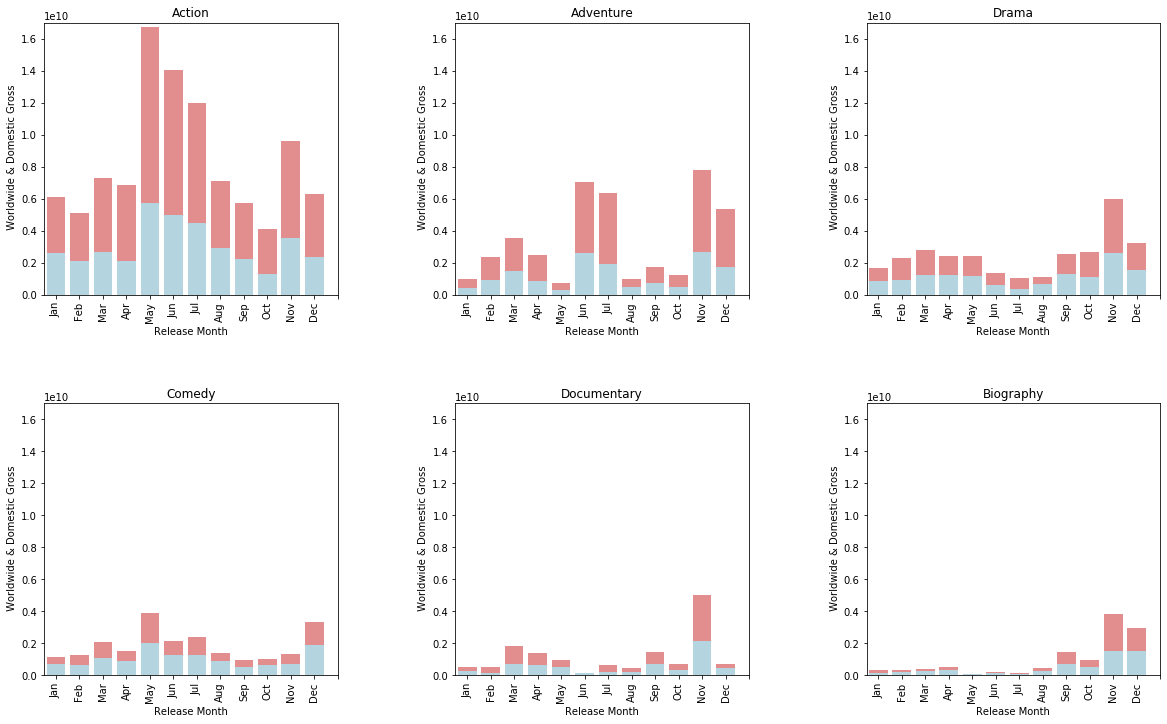

In [156]:
print("Worldwide Gross (Pink) & Domestic Gross (Blue) in Tens of Billions")
print("Total amount for each genre by month over the past 10 years")
#Action
plt.figure(figsize=(20, 12))
xval = np.array([1,2,3,4,5,6,7,8,9,10,11,12])
ax1 = plt.subplot(2, 3, 1)
ax1 = sns.barplot(data = action, x = xval, color = 'lightcoral', y='worldwide_gross')
ax1 = sns.barplot(data = action, x = xval, color = 'lightblue', y='domestic_gross')
plt.ylim(top=17000000000)
ax1.set_title('Action')
plt.xlabel('Release Month')
plt.ylabel(' Worldwide & Domestic Gross')
plt.xticks([0, 1, 2, 3, 4, 5, 6 ,7, 8, 9, 10, 11, 12], 
           ['Jan', 'Feb', 'Mar', 'Apr', 
            'May', 'Jun', 'Jul', 'Aug',
            'Sep', 'Oct', 'Nov', 'Dec',], rotation=90);
#Adventure
ax2 = plt.subplot(2, 3, 2)
ax2 = sns.barplot(data = adventure, x = xval, color = 'lightcoral', y='worldwide_gross')
ax2 = sns.barplot(data = adventure, x = xval, color = 'lightblue', y='domestic_gross')
plt.ylim(top=17000000000)
ax2.set_title('Adventure')
plt.xlabel('Release Month')
plt.ylabel(' Worldwide & Domestic Gross')
plt.xticks([0, 1, 2, 3, 4, 5, 6 ,7, 8, 9, 10, 11, 12], 
           ['Jan', 'Feb', 'Mar', 'Apr', 
            'May', 'Jun', 'Jul', 'Aug',
            'Sep', 'Oct', 'Nov', 'Dec',], rotation=90);

#Drama
ax3 = plt.subplot(2, 3, 3)
ax3 = sns.barplot(data = drama, x = xval, color = 'lightcoral', y='worldwide_gross')
ax3 = sns.barplot(data = drama, x = xval, color = 'lightblue', y='domestic_gross')
plt.ylim(top=17000000000)
ax3.set_title('Drama')
plt.xlabel('Release Month')
plt.ylabel(' Worldwide & Domestic Gross')
plt.xticks([0, 1, 2, 3, 4, 5, 6 ,7, 8, 9, 10, 11, 12], 
           ['Jan', 'Feb', 'Mar', 'Apr', 
            'May', 'Jun', 'Jul', 'Aug',
            'Sep', 'Oct', 'Nov', 'Dec',], rotation=90);

#Comedy
ax4 = plt.subplot(2, 3, 4)
ax4 = sns.barplot(data = comedy, x = xval, color = 'lightcoral', y='worldwide_gross')
ax4 = sns.barplot(data = comedy, x = xval, color = 'lightblue', y='domestic_gross')
plt.ylim(top=17000000000)
ax4.set_title('Comedy')
plt.xlabel('Release Month')
plt.ylabel(' Worldwide & Domestic Gross')
plt.xticks([0, 1, 2, 3, 4, 5, 6 ,7, 8, 9, 10, 11, 12], 
           ['Jan', 'Feb', 'Mar', 'Apr', 
            'May', 'Jun', 'Jul', 'Aug',
            'Sep', 'Oct', 'Nov', 'Dec',], rotation=90);

#Documentary
ax5 = plt.subplot(2, 3, 5)
ax5 = sns.barplot(data = documentary,x = xval, color = 'lightcoral', y='worldwide_gross')
ax5 = sns.barplot(data = documentary, x = xval, color = 'lightblue', y='domestic_gross')
plt.ylim(top=17000000000)
ax5.set_title('Documentary')
plt.xlabel('Release Month')
plt.ylabel(' Worldwide & Domestic Gross')
plt.xticks([0, 1, 2, 3, 4, 5, 6 ,7, 8, 9, 10, 11, 12], 
           ['Jan', 'Feb', 'Mar', 'Apr', 
            'May', 'Jun', 'Jul', 'Aug',
            'Sep', 'Oct', 'Nov', 'Dec',], rotation=90);

#Biography
ax6 = plt.subplot(2, 3, 6)
ax6 = sns.barplot(data = biography, x = xval, color = 'lightcoral', y='worldwide_gross')
ax6 = sns.barplot(data = biography, x = xval, color = 'lightblue', y='domestic_gross')
ax6.set_title('Biography')
plt.xlabel('Release Month')
plt.ylabel(' Worldwide & Domestic Gross')
plt.xticks([0, 1, 2, 3, 4, 5, 6 ,7, 8, 9, 10, 11, 12], 
           ['Jan', 'Feb', 'Mar', 'Apr', 
            'May', 'Jun', 'Jul', 'Aug',
            'Sep', 'Oct', 'Nov', 'Dec',], rotation=90)
plt.ylim(top=17000000000)  


plt.subplots_adjust(wspace=0.4)
plt.subplots_adjust(hspace=0.4);


## Conclusion:

Given the data above, we can create the following release schedule for our top six genres:

| Genre       | Best Month | 2nd Best Month |
|-------------|------------|----------------|
| Action      | May        | Jun            |
| Adventure   | Nov        | Jun            |
| Drama       | Nov        | Dec            |
| Comedy      | May        | Dec            |
| Documentary | Nov        | Mar            |
| Biography   | Nov        | Dec            |

As it may not be wise to release most of your movies in November, it's helpful to look at the second and third best months<br>
 for each genre as alternatives.  